

저 다시 확인했는데 이 코드는 train은 안 하는 코드입니다! 중간에 그 부분은 오류가 나서 삭제한 상태입니다.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install mxnet

In [2]:
!pip install gluoncv

In [3]:
#!pip uninstall torch -y
#!pip install torch==1.13.1

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 54.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchvision 0.15.2+cu118

In [5]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mxnet import nd
from mxnet.gluon.data.vision import transforms
from gluoncv.model_zoo import get_model
from mxnet import gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import ImageFolderDataset


# 모델을 불러옴 (미리 학습된 가중치 사용)
model_name = 'slowfast_4x16_resnet50_kinetics400'
net = get_model(model_name, nclass=400, pretrained=True)

# 데이터셋 경로
dataset_path = '/content/drive/MyDrive/Final_team_3/Data/UCF/Train'

# 모든 클래스 폴더의 리스트를 가져옴
class_folders = sorted(glob.glob(os.path.join(dataset_path, '*')))

19076


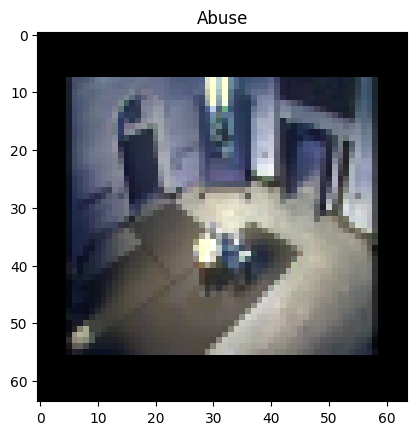

26397


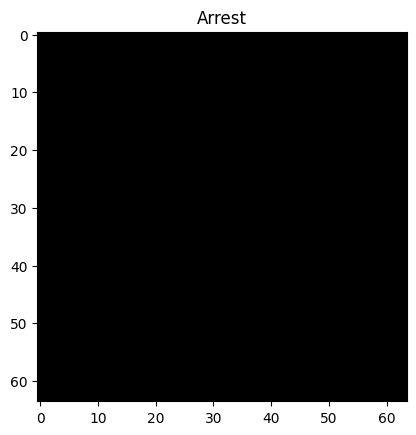

24421


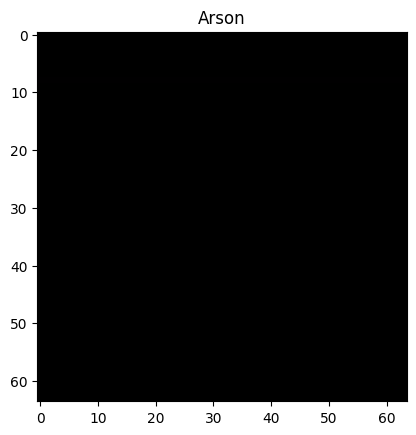

10360


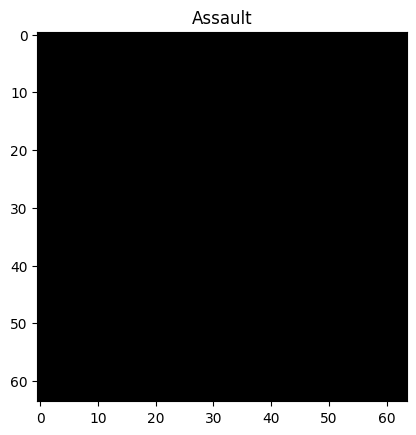

39504


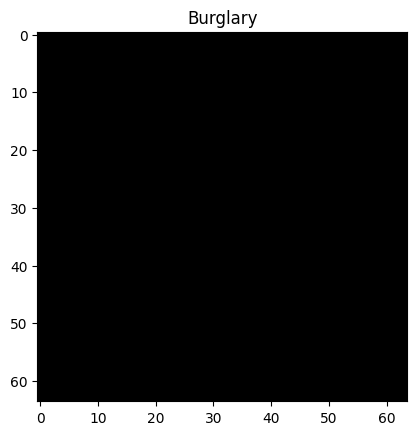

18753


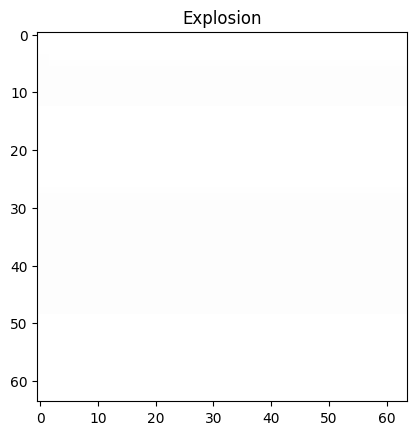

24684


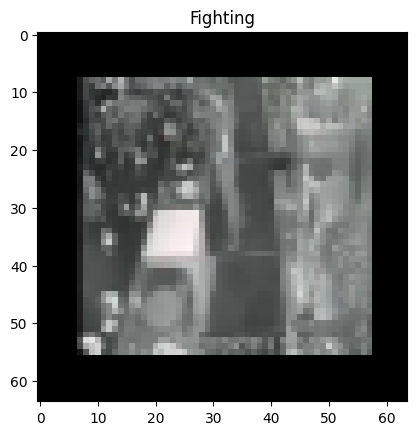

141423


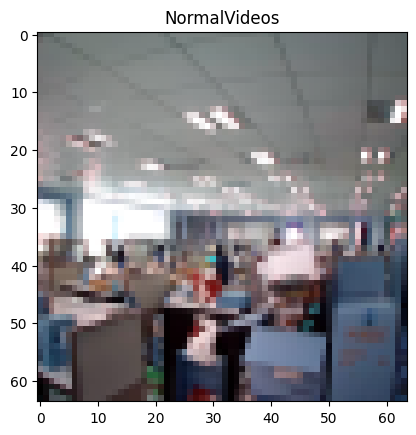

1230


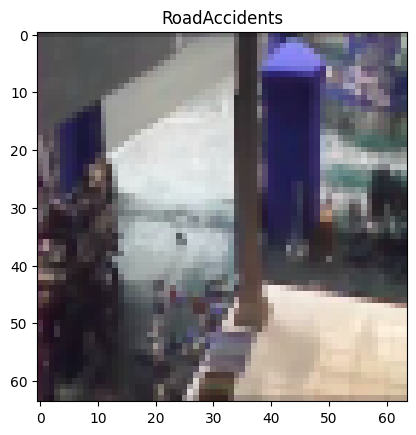

In [ ]:
# 이미지가 폴더 안에 존재하는지 확인하기 위해 첫 번째 이미지만 출력
for class_folder in class_folders:
    class_name = os.path.basename(class_folder)
    image_files = sorted(glob.glob(os.path.join(class_folder, '*.png')))
    print(len(image_files))
    for image_file in image_files:
        img = cv2.imread(image_file)
        plt.figure()
        plt.imshow(img)
        plt.title(class_name)  # 클래스 이름 표시
        plt.show()
        break  # 첫 번째 이미지만 출력하려면 이 줄을 제거하거나 주석 처리

In [ ]:
# 모든 클래스 폴더를 순회하며 이미지 시퀀스 데이터를 생성하여 분류
for class_folder in class_folders:
    class_name = os.path.basename(class_folder)
    image_files = sorted(glob.glob(os.path.join(class_folder, '*.png')))  # 확장자 .png로 수정
    if len(image_files) > 0:  # 이미지 파일이 있는 경우에만 처리
        clip_input = []
        for image_file in image_files:
          try:
            img = cv2.imread(image_file)  # 이미지 로드 (OpenCV 사용)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 채널 변경
            transform_fn = transforms.Compose([
                transforms.Resize(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])
            img = transform_fn(nd.array(img))  # 전처리
            clip_input.append(img)  # 전처리된 이미지를 리스트에 추가
          except Exception as e:
            print(f"Error processing image - {image_file}: {e}")
        clip_input = nd.stack(*clip_input)  # 전처리된 이미지 리스트를 NDArray로 변환
        clip_input = clip_input.expand_dims(0)  # 배치 차원 추가
        pred = net(clip_input)  # MXNet NDArray를 입력으로 사용

        # 클래스 정보 로드
        classes = net.classes
        topK = 5
        ind = nd.topk(pred, k=topK)[0].astype('int')

        # 결과 출력
        print('Class:', class_name)
        for i in range(topK):
            print('\t[%s], with probability %.3f.' %
                  (classes[ind[i].asscalar()], nd.softmax(pred)[0][ind[i]].asscalar()))
    else:
        print(f'No images found for class: {class_name}')

No images found for class: Abuse
No images found for class: Arrest
No images found for class: Arson
Error processing image - /content/drive/MyDrive/Final_team_3/Data/archive (2)/Train/Assault/Assault020_x264_40.png: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image - /content/drive/MyDrive/Final_team_3/Data/archive (2)/Train/Assault/Assault020_x264_400.png: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image - /content/drive/MyDrive/Final_team_3/Data/archive (2)/Train/Assault/Assault020_x264_410.png: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image - /content/drive/MyDrive/Final_team_3/Data/archive (2)/Train/Assault/Assault020_x264_420.png: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/c

MXNetError: ignored

---

이 이하는 무시하셔도 됩니다

In [ ]:
from __future__ import division

import argparse, time, logging, os, sys, math

import numpy as np
import mxnet as mx
import gluoncv as gcv
from mxnet import gluon, nd, init, context
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

from gluoncv.data.transforms import video
from gluoncv.data import Kinetics400
from gluoncv.model_zoo import get_model
from gluoncv.utils import makedirs, LRSequential, LRScheduler, split_and_load, TrainingHistory

# number of GPUs to use
num_gpus = 1
ctx = [mx.gpu(i) for i in range(num_gpus)]

# Get the model slowfast_4x16_resnet50_kinetics400 with 400 output classes, without pre-trained weights
net = get_model(name='slowfast_4x16_resnet50_kinetics400', nclass=400)
net.collect_params().reset_ctx(ctx)
print(net)

transform_train = transforms.Compose([
    # Fix the input video frames size as 256×340 and randomly sample the cropping width and height from
    # {256,224,192,168}. After that, resize the cropped regions to 224 × 224.
    video.VideoMultiScaleCrop(size=(224, 224), scale_ratios=[1.0, 0.875, 0.75, 0.66]),
    # Randomly flip the video frames horizontally
    video.VideoRandomHorizontalFlip(),
    # Transpose the video frames from height*width*num_channels to num_channels*height*width
    # and map values from [0, 255] to [0,1]
    video.VideoToTensor(),
    # Normalize the video frames with mean and standard deviation calculated across all images
    video.VideoNormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Batch Size for Each GPU
per_device_batch_size = 5
# Number of data loader workers
num_workers = 0
# Calculate effective total batch size
batch_size = per_device_batch_size * num_gpus

# Set train=True for training the model.
# ``new_length`` indicates the number of frames we will cover.
# For SlowFast network, we evenly sample 32 frames for the fast branch and 4 frames for the slow branch.
# This leads to the actual input length of 36 video frames.
train_dataset = Kinetics400(train=True, new_length=64, slowfast=True, transform=transform_train)
print('Load %d training samples.' % len(train_dataset))
train_data = gluon.data.DataLoader(train_dataset, batch_size=batch_size,
                                   shuffle=True, num_workers=num_workers)

lr_decay = 0.1
warmup_epoch = 34
total_epoch = 196
num_batches = len(train_data)
lr_scheduler = LRSequential([
    LRScheduler('linear', base_lr=0.01, target_lr=0.1,
                nepochs=warmup_epoch, iters_per_epoch=num_batches),
    LRScheduler('cosine', base_lr=0.1, target_lr=0,
                nepochs=total_epoch - warmup_epoch,
                iters_per_epoch=num_batches,
                step_factor=lr_decay, power=2)
])

# Stochastic gradient descent
optimizer = 'sgd'
# Set parameters
optimizer_params = {'learning_rate': 0.01, 'wd': 0.0001, 'momentum': 0.9}
optimizer_params['lr_scheduler'] = lr_scheduler

# Define our trainer for net
trainer = gluon.Trainer(net.collect_params(), optimizer, optimizer_params)

loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()

train_metric = mx.metric.Accuracy()
train_history = TrainingHistory(['training-acc'])

epochs = 0

for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0

    # Loop through each batch of training data
    for i, batch in enumerate(train_data):
        # Extract data and label
        data = split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = split_and_load(batch[1], ctx_list=ctx, batch_axis=0)

        # AutoGrad
        with ag.record():
            output = []
            for _, X in enumerate(data):
                X = X.reshape((-1,) + X.shape[2:])
                pred = net(X)
                output.append(pred)
            loss = [loss_fn(yhat, y) for yhat, y in zip(output, label)]

        # Backpropagation
        for l in loss:
            l.backward()

        # Optimize
        trainer.step(batch_size)

        # Update metrics
        train_loss += sum([l.mean().asscalar() for l in loss])
        train_metric.update(label, output)

        if i == 100:
            break

    name, acc = train_metric.get()

    # Update history and print metrics
    train_history.update([acc])
    print('[Epoch %d] train=%f loss=%f time: %f' %
        (epoch, acc, train_loss / (i+1), time.time()-tic))

# We can plot the metric scores with:
train_history.plot()

In [7]:
# 모델을 불러옴 (미리 학습된 가중치 사용)
model_name = 'slowfast_4x16_resnet50_kinetics400'
net = get_model(model_name, nclass=400, pretrained=True)

# 이미지 전처리 함수 정의
def preprocess_image(img):
    transform_fn = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img = transform_fn(img)
    return img

# 데이터셋 생성
train_dataset = ImageFolderDataset(root=dataset_path, transform=preprocess_image)
batch_size = 32
train_data = gluon.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 훈련 파라미터 설정
epochs = 10
lr = 0.001
ctx = mx.gpu(0)  # GPU를 사용하여 훈련

# 네트워크 초기화 및 GPU 설정
net.collect_params().reset_ctx(ctx)

# 손실 함수 정의
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()

# 옵티마이저 정의
trainer = gluon.Trainer(net.collect_params(), 'adam', {'learning_rate': lr})

# 훈련 루프
for epoch in range(epochs):
    train_loss = 0.0
    for data, label in train_data:
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        with autograd.record():
            output = net(data)
            loss = loss_fn(output, label)
        loss.backward()
        trainer.step(batch_size)
        train_loss += loss.mean().asscalar()
    print("Epoch %d: loss %.4f" % (epoch + 1, train_loss / len(train_data)))

print("Training completed!")

NameError: ignored